# Daily News for Stock Market Prediction 

   ### Preprocessing and modeling_Exponential Moving Average and Linear Regression model

  ### 8 years daily news headlines to predict stock market movement
  

  
### Introduction:

News is getting delayed to the public and professional traders react to the market news very fast before the real numbers are released. 
Controlling manipulators is a big task in the market. The information leakage on trading behavior and market efficiency will lead to high stock fluctuation before the public announcement.

A single-predictor model fails to beat the prediction of stock returns. So here I am applying `Time-series Analysis`, `Recurrent Neural Networks`, and `Natural Language Processing` to predict.
The goal is to improve the accuracy of stock return forecasts by combining new technical indicators and news.

data collection : https://www.kaggle.com/aaron7sun/stocknews/code


Finding the right combination of features to make those predictions profitable. we’ll train a regression model using historic pricing data and technical indicators to make predictions on future prices.

In [433]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6
pd.set_option('mode.chained_assignment', 'raise') # Raise an exception, warn, or no action if trying to use chained assignment

### Load the data

In [434]:
DJIA_comb = pd.read_csv(".\DJIA_comb.csv", index_col='Date',parse_dates=True)
DJIA_comb.head(1)

,Open,High,Low,Close,Volume,Adj Close,Daily_Returns,Label,Top1,Top2,...,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split,combined_news_split_wo_stopwords,Top_News_lemmatized
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.004076,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,bGeorgia downs two Russian warplanes as countr...,Georgia 'downs two Russian warplanes' as count...,"['georgia', 'downs', 'two', 'russian', 'warpla...","['georgia', 'downs', 'two', 'russian', 'warpla...",georgia down two russian warplane country move...


In [444]:
price = DJIA_comb[['Adj Close']]
price.head(2)

,Adj Close
Date,
2008-08-08,11734.320312
2008-08-11,11782.349609


In [445]:
print(price.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 2008-08-08 to 2016-06-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1985 non-null   float64
dtypes: float64(1)
memory usage: 31.0 KB
None


### Exponential Moving Average (EMA)
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average.

`EMA = Closing price x multiplier + EMA (previous day) x (1-multiplier)`

In [453]:
import pandas_ta as ta


In [462]:
price.ta.ema(close=['Adj Close'], length=50, append=True)

,Adj Close,EMA_50
Date,,
2008-08-08,11734.320312,NaN
2008-08-11,11782.349609,NaN
2008-08-12,11642.469727,NaN
2008-08-13,11532.959961,NaN
2008-08-14,11615.929688,NaN
...,...,...
2016-06-24,17400.750000,17703.368526
2016-06-27,17140.240234,17681.285063
2016-06-28,17409.720703,17670.635481


In [465]:
price = price.dropna()
price.head()

,Adj Close,EMA_50
Date,,
2008-10-17,8852.219727,10813.329004
2008-10-20,9265.429688,10752.627070
2008-10-21,9033.660156,10685.216603
2008-10-22,8519.209961,10600.275166
2008-10-23,8691.250000,10525.411434


#### Historic pricing from 2008-2016 with the EMA overlaid. 

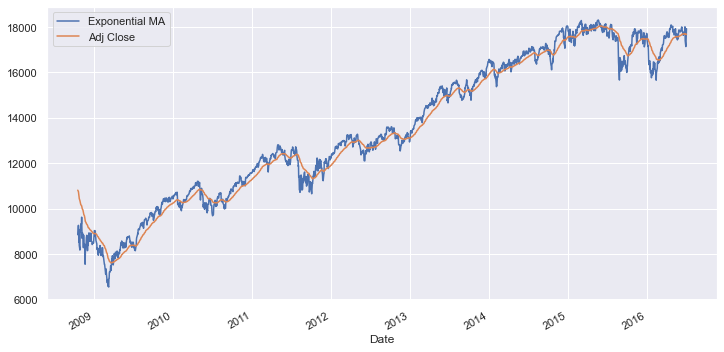

In [466]:
price.plot(grid=True)
plt.legend(['Exponential MA','Adj Close']) 

### Test-Train Split

Using eighty percent of data for training and the remaining twenty percent for testing is common. 

In [469]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(price[['Adj Close']], price[['EMA_50']], test_size=.2)

In [470]:
# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

          Adj Close
count    388.000000
mean   13290.246120
std     3233.605480
min     6594.439941
25%    10684.592774
50%    12870.215332
75%    16423.947266
max    18132.699219
          Adj Close
count   1548.000000
mean   13591.009412
std     3129.236660
min     6547.049805
25%    11010.760254
50%    13142.375000
75%    16530.647949
max    18312.390625


### Training the Model

 We want to see how well it can be fit to a linear model. `Scikit-learn’s` `LinearRegression` class makes this simple enough.

In [473]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [474]:
y_pred.shape

(388, 1)

### Validating the Fit

The linear model generates coefficients for each feature during training and returns these values as an array. 

we can use the predicted values from our trained model to calculate the mean squared error and the coefficient of determination using other functions from the `sklearn.metrics` module.

In [475]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R Squared- Coefficient of Determination:", r2_score(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))

Model Coefficients: [[0.97278127]]
Mean Absolute Error: 326.5384410234859
R Squared- Coefficient of Determination: 0.9818365696549988
mean_squared_error: 188149.38593945582


#### Observation: 

 - The R-squared of the model is 99.62%. R-squared is always between 0 and 100%. 
 - A score close to 100% indicates that the model explains the prices well

In [476]:
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rmse

433.7619000551522

#### observation: 
  A lower MAE value is better, and the closer our coefficient of the correlation value is to 1.0 the better. The metrics here suggest that our model fits our data well, though the MAE is slightly high

In [478]:
X = price[['Adj Close']]
y = price[["EMA_50"]]
#fitting Simple Regression to training set
# Linear regression Model for stock prediction 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2 , shuffle=False,random_state = 0)

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(X_train, y_train)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression_confidence = regression.score(X_test, y_test)
print("linear regression confidence: ", regression_confidence)

#predecting the test set results
predicted=regression.predict(X_test)
print(X_test.head())

print(predicted.shape)

regression coefficient [[0.95482117]]
regression intercept [463.31077502]
linear regression confidence:  -0.5295739245608706
               Adj Close
Date                    
2014-12-16  17068.869141
2014-12-17  17356.869141
2014-12-18  17778.150391
2014-12-19  17804.800781
2014-12-22  17959.439453
(388, 1)


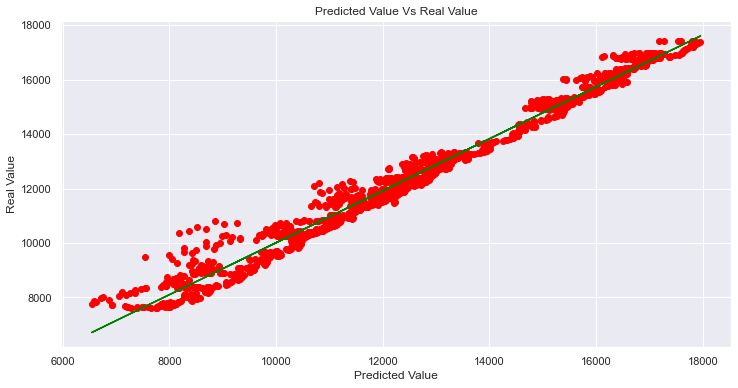

In [482]:
#Visualization of the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'green')
plt.title('Predicted Value Vs Real Value')
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')
plt.show()

#### Observation:
At this point, we’ve trained a model on historical pricing data using the Adjusted Closing value and the Exponential Moving Average. Our goal was to develop a model that can use the EMA of any given day (dependent on pricing from the previous days) and accurately predict that day’s closing price.

In [483]:
# Build a new dataset for the test data to plot the prediction result
X_test_MA = X_test.copy()
X_test_MA['Prediction'] = predicted

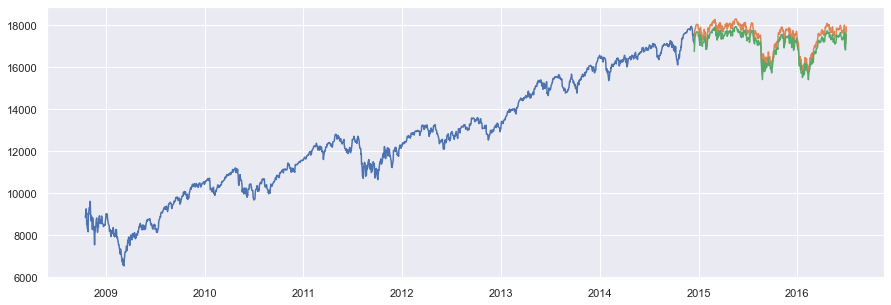

In [484]:
# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(X_train)
plt.plot(X_test_MA)

## Model2: Linear Regression using all the features of the data

#### Load the Dow Jones Industrial Average data

In [485]:
DJIA_table = pd.read_csv('./upload_DJIA_table.csv')

DJIA_table['Date'] = pd.to_datetime(DJIA_table['Date'], format='%Y-%m-%d')
DJIA_table.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [486]:
X = DJIA_table[['Open', 'High','Low', 'Volume']]
y = DJIA_table['Adj Close']

#### Train and split the data

In [487]:
# Linear regression Model for stock prediction 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.15 , shuffle=False,random_state = 0)

In [488]:
# let's check if total observation makes sense
print(X_train.shape )
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1690, 4)
(299, 4)
(1690,)
(299,)


#### Regression algorithm model implementation

In [489]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(X_train, y_train)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-5.69409708e-01  8.48660103e-01  7.19535516e-01 -5.79820840e-08]
regression intercept 22.78927549225591


In [490]:
regression_confidence = regression.score(X_test, y_test)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.995268223661166


#### Observation:

The coefficient of determination R² for our data is at 0.99 which’s 99%, which means that our model is a linear model that explains the variation of all Y values.

In [491]:
predicted=regression.predict(X_test)
print(X_test.head())

             Open          High          Low     Volume
1690  9873.549805  10027.730469  9873.480469  284810000
1691  9883.980469   9895.089844  9815.059570  211510000
1692  9865.240234   9931.820312  9849.370117  158850000
1693  9786.040039   9865.009766  9764.879883  161120000
1694  9728.219727   9836.669922  9728.070312  209580000


In [492]:
predicted.shape

(299,)

#### Prediction Table of Actual Prices vs Predicted values

In [493]:
DJIA_predicted =pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predicted})
DJIA_predicted.head(10)

,Actual_Price,Predicted_Price
1690,10015.860352,9998.634919
1691,9871.059570,9842.342967
1692,9885.799805,9911.926515
1693,9864.940430,9839.399086
1694,9786.870117,9818.976033
1695,9725.580078,9703.339580
1696,9731.250000,9747.316365
1697,9599.750000,9600.118760
1698,9487.669922,9464.895056
1699,9509.280273,9555.190048


The below table displays a summary statistics values of actual values vs predicted values of the dataset

In [494]:
DJIA_predicted.describe()

,Actual_Price,Predicted_Price
count,299.000000,299.000000
mean,8922.361010,8927.873222
std,1151.086998,1152.500506
min,6547.049805,6612.097920
25%,8184.449951,8210.270081
50%,8668.389648,8648.905775
75%,9491.975097,9493.476375
max,11782.349609,11805.281401


### Model Evaluation

MAE and RMSE are the most common statistical metrics used to measure continuous variables or in our case the accuracy of our regression models.

  - Mean Absolute Error (MAE):
   
      - MAE measures the average magnitude of the errors in a set of predictions, without considering their direction
  
  - Root mean squared error (RMSE):
       - RMSE is a quadratic scoring rule that also measures the average magnitude of the error.
  
  - Mean squared error (MSE):
  
      - MSE measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
      
      
      All mentioned metrics above can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means the lower values they present the better. Remember that RMSE will always be larger in value than MSE, Also it can penalize more error-related data so RMSE can be a better measure than MSE.

 - Data scaling is a recommended pre-processing step when working with many machine learning algorithms.
 - Data scaling can be achieved by normalizing or standardizing real-valued input and output variables.
 - Apply standardization and normalization to improve the performance of predictive modeling algorithms.

In [541]:
#Call the StandardScaler`s fit method on `X_train` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_train` and `X_test`), naming the results `X_train_scaled` and `X_test_scaled`, respectively

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [504]:
lm = LinearRegression().fit(X_train_scaled, y_train)

In [505]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)

In [540]:
import sklearn.metrics as metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error (RMSE):', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 34.20557736911722 55.738955408921335
Mean Squared Error (MSE) : 2312.9625417409297 6248.641095587581
Root Mean Squared Error (RMSE): 0.9996742774610294 0.9952682236612378


#### Observation:

Root Mean Squared Error of our metric results are showing values less than 1, from an interpretation standpoint, I think RMSE is a better metric measurement for linear problems than MAE and MSE, as RMSE describe average error alone and has other implications that are more difficult to tease out and understand.



In [542]:
x2 = DJIA_predicted.Actual_Price.mean()
y2 = DJIA_predicted.Predicted_Price.mean()
Accuracy1 = x2/y2*100

print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.93825839150713


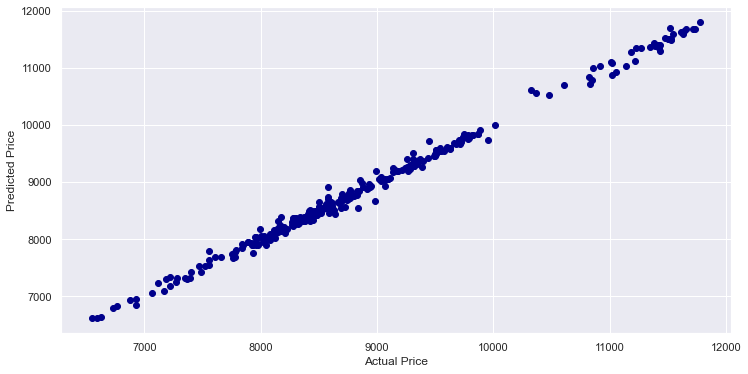

In [543]:
plt.scatter(DJIA_predicted.Actual_Price, DJIA_predicted.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

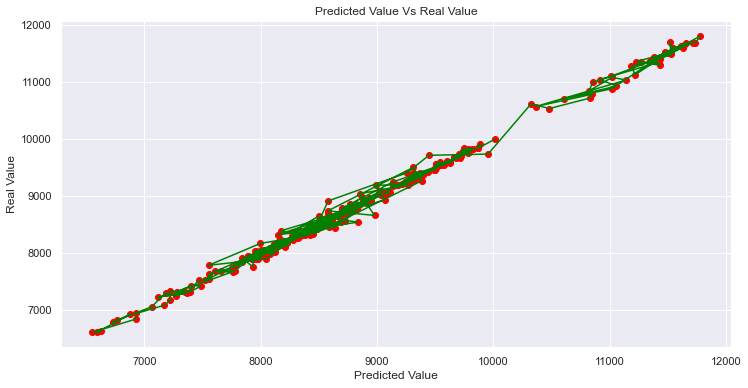

In [498]:
#Visualization of the training set results
plt.scatter(DJIA_predicted.Actual_Price, DJIA_predicted.Predicted_Price, color = 'red')
plt.plot(DJIA_predicted.Actual_Price, DJIA_predicted.Predicted_Price, color = 'green')
plt.title('Predicted Value Vs Real Value')
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


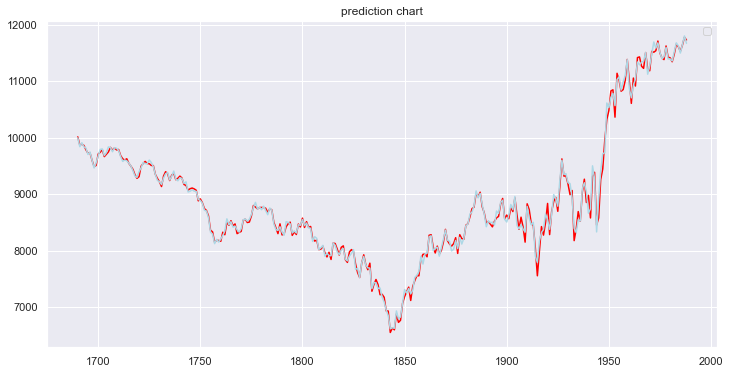

In [499]:
plt.plot(DJIA_predicted.Actual_Price, color='red')
plt.plot(DJIA_predicted.Predicted_Price, color='lightblue')
plt.title("prediction chart")
plt.legend();

## Model 3 - Using `Date` and `Adjusted Closing Price`

In [256]:
DJIA_comb = pd.read_csv(".\DJIA_comb.csv")
DJIA_comb.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close,Daily_Returns,Label,Top1,...,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split,combined_news_split_wo_stopwords,Top_News_lemmatized
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.004076,0,Georgia 'downs two Russian warplanes' as count...,...,Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,bGeorgia downs two Russian warplanes as countr...,Georgia 'downs two Russian warplanes' as count...,"['georgia', 'downs', 'two', 'russian', 'warpla...","['georgia', 'downs', 'two', 'russian', 'warpla...",georgia down two russian warplane country move...


In [257]:
price_new = DJIA_comb.reset_index()[['Date', 'Adj Close']]
price_new.head()

,Date,Adj Close
0,2008-08-08,11734.320312
1,2008-08-11,11782.349609
2,2008-08-12,11642.469727
3,2008-08-13,11532.959961
4,2008-08-14,11615.929688


In [258]:
price_new.shape

(1985, 2)

In [259]:
# Feature engineering of extra columns
# Add new features made from Date column
price_new['Date'] = pd.to_datetime(price_new['Date'], errors='coerce')

price_new['Year'] = price_new['Date'].dt.year
price_new['Month'] = price_new['Date'].dt.month
price_new['Week'] = price_new['Date'].dt.isocalendar().week
price_new['Day'] = price_new['Date'].dt.day
price_new['Dayofweek'] = price_new['Date'].dt.dayofweek
price_new['Dayofyear'] = price_new['Date'].dt.dayofyear
price_new['Is_month_start'] = price_new['Date'].dt.is_month_start.astype('int')
price_new['Is_month_end'] = price_new['Date'].dt.is_month_end.astype('int')
price_new['Is_quarter_start'] = price_new['Date'].dt.is_quarter_start.astype('int')
price_new['Is_quarter_end'] = price_new['Date'].dt.is_quarter_end.astype('int')
price_new['Is_year_start'] = price_new['Date'].dt.is_year_start.astype('int')
price_new['Is_year_end'] = price_new['Date'].dt.is_year_end.astype('int')

In [260]:
price_new['mon_fri'] = 0
for i in range(0,len(price_new)):
    if (price_new['Dayofweek'][i] == 0 or new_data1['Dayofweek'][i] == 4):
        price_new.loc[i, 'mon_fri'] = 1

In [261]:
# Create new Train and Test datasets
train = price_new[:1484]
test = price_new[1484:]

X_train = train.drop('Adj Close', axis=1)
X_test = test.drop('Adj Close', axis=1)
y_train = train['Adj Close']
y_test = test['Adj Close']

In [262]:
X_train['Date']=X_train['Date'].map(dt.datetime.toordinal)
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)

In [263]:
#implement liner regression
model = LinearRegression()
model.fit(X_train,y_train)

#make predictions and find the rmse
prediction = model.predict(X_test)
prediction[:10]

array([16196.24197551, 16197.26831573, 16198.29465596, 16204.75841693,
       16220.40566006, 16215.99457953, 16217.02091977, 16218.04725999,
       16224.51102097, 16240.15826408])

In [264]:
# Make predictions and find the rmse
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

1027.6328772962165

In [265]:
## Optional: It is not a good measure to use to assess performance
lr_score = model.score(X_test, y_test)
print("lr R^2 score: ", lr_score)

lr R^2 score:  -1.8609739161991468


In [267]:
## Assign a new column to plot the predictions
test_copy = test.copy()
test_copy['Predictions'] = prediction

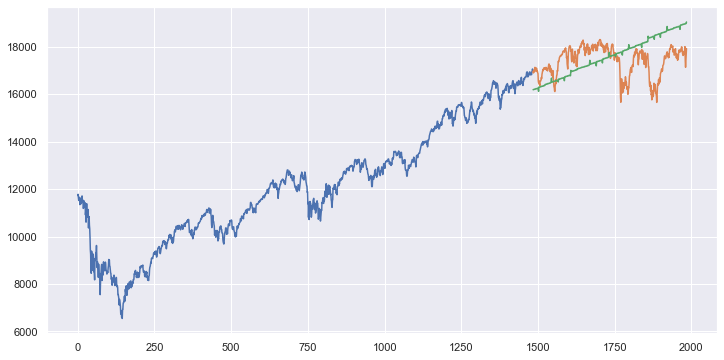

In [268]:
#plot
plt.plot(train['Adj Close'])
plt.plot(test_copy[['Adj Close','Predictions']])

#### Conclusion:
    The stock market has been always the hottest topic when it comes to time series forecasting or trying to feel where the market is going overall.
    
    uncertainty of moving variables that could impact the stock market volatility from associated risk to political instability and Macroeconomic factors, well the list could go on.
    
    relying on regression models and predicting certain values based on past performance is not good enough.
    
Reference1: https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9

Reference1: https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/